In [7]:
import os
import torch
from torchvision import transforms
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
os.chdir('d:\PythonProjects\ComputerVisionLearning')
cur_dir = os.getcwd()

image_path = os.path.join(cur_dir, 'images', 'StackedSetsRaw')

image_list = os.listdir(image_path)

In [9]:
class CustomDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = torchvision.io.image.read_image(img_path)
        # Simple normalization from 0 to 1
        image[image!=0] = 1
        # Test to get rid of datatype error
        image = image.float()
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        sample = (image, label)
        return sample 

In [10]:
annotations_file = os.path.join(cur_dir, "main_project", 'vedaant', 'data_labels.csv')
img_dir = os.path.join(cur_dir, 'images', 'StackedSetsRaw')

dataset = CustomDataset(annotations_file=annotations_file, img_dir=img_dir)

In [11]:
def show_image(item):
    image = item[0]
    label = item[1]
    print(f"Label: {label}")
    img = image[0].squeeze()
    plt.imshow(img, cmap='gray')

In [12]:
dataset_len = dataset.__len__()

train_size = int(0.8*dataset_len)
test_size = dataset_len - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [13]:
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=True)
train_features, train_labels = next(iter(train_dataloader))

Feature batch shape: torch.Size([2, 1, 160, 20])
Labels batch shape: torch.Size([2])
torch.Size([160, 40])


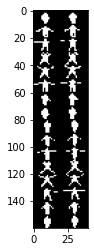

In [17]:
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')

# Each time this is run, it should display a random image
img = train_features.view(160, -1)
print(img.size())
plt.imshow(img, cmap='gray')
plt.show()

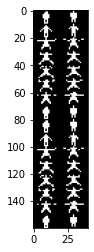

NameError: name 'model' is not defined

In [29]:
img_list = os.listdir(img_dir)


first_image = img_list[0]
second_image = img_list[1]

img1_path = os.path.join(img_dir, first_image)
img2_path = os.path.join(img_dir, second_image)
 
    
img1 = torchvision.io.image.read_image(img1_path)
img2 = torchvision.io.image.read_image(img1_path)

# image = torchvision.io.image.read_image(img_path)


new = torch.cat((img1, img2))

new.size()

img = new.view(160, -1)

plt.imshow(img, cmap='gray')
plt.show()

outputs = model(img)
